# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler
import plotter

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=True, enhanced=True)


Loading dataset: 100%|██████████| 4/4 [00:10<00:00,  2.71s/it]


# Methods

In [5]:
def print_year_occurrences(dataframe: pd.DataFrame):
    print(dataframe["time_call_received"].dt.year.value_counts())


# Main

In [6]:
original_dataframe = data_loader.processed_incidents_df.copy()

original_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754811 entries, 0 to 754810
Data columns (total 92 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   triage_impression_during_call        754802 non-null  object        
 1   resource_id                          754811 non-null  object        
 2   resource_type                        754811 non-null  object        
 3   resources_sent                       754811 non-null  int64         
 4   time_call_received                   754811 non-null  datetime64[ns]
 5   time_incident_created                754811 non-null  datetime64[ns]
 6   time_resource_appointed              754333 non-null  datetime64[ns]
 7   time_ambulance_dispatch_to_scene     731707 non-null  datetime64[ns]
 8   time_ambulance_arrived_at_scene      665649 non-null  datetime64[ns]
 9   time_ambulance_dispatch_to_hospital  560737 non-null  datetime64[ns]
 

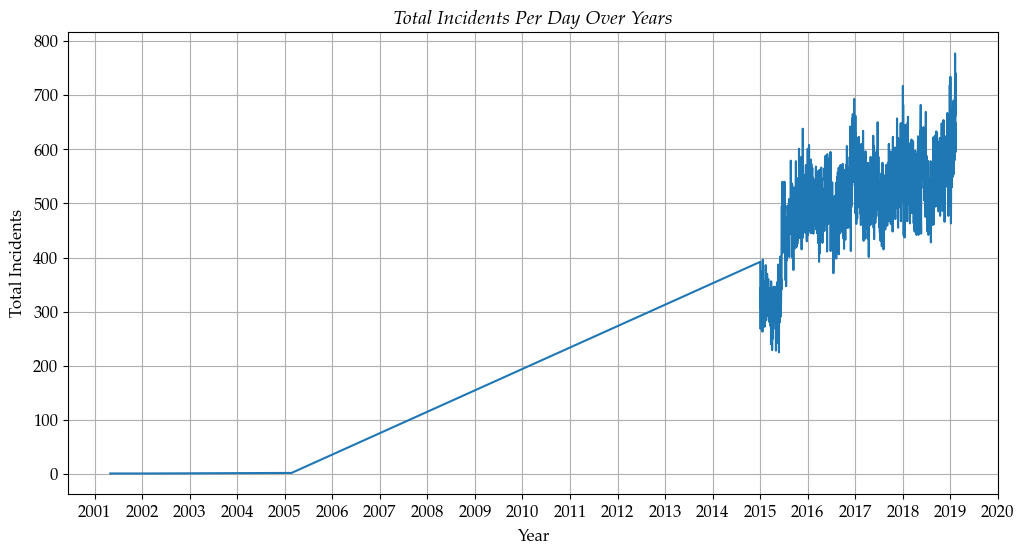

time_call_received
2018    201675
2017    193086
2016    185976
2015    147880
2019     26190
2005         2
2001         1
2002         1
Name: count, dtype: int64


In [7]:
plotter.incidents_over_years(original_dataframe)
print_year_occurrences(original_dataframe)


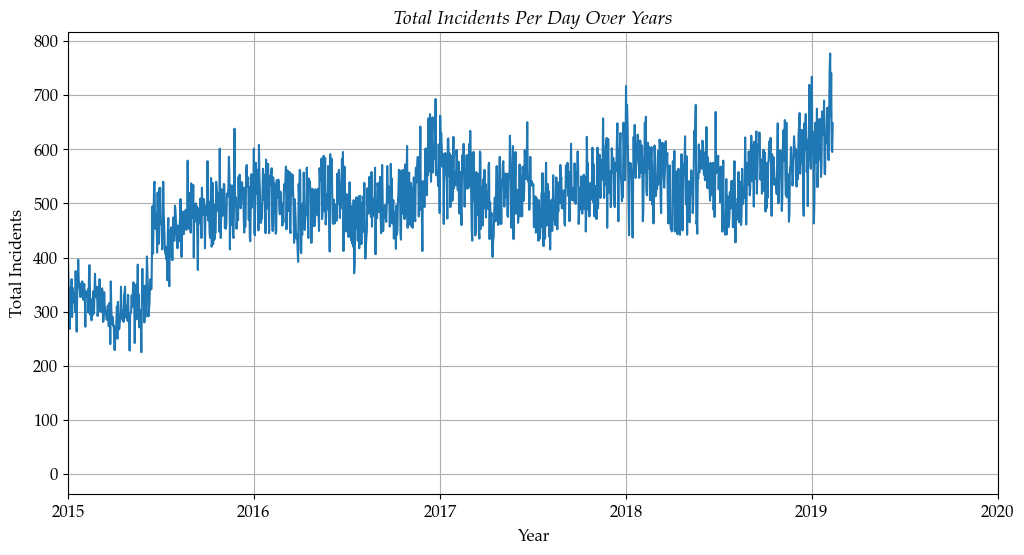

In [8]:
plotter.incidents_over_years(original_dataframe, limit_left="2015-01-01")


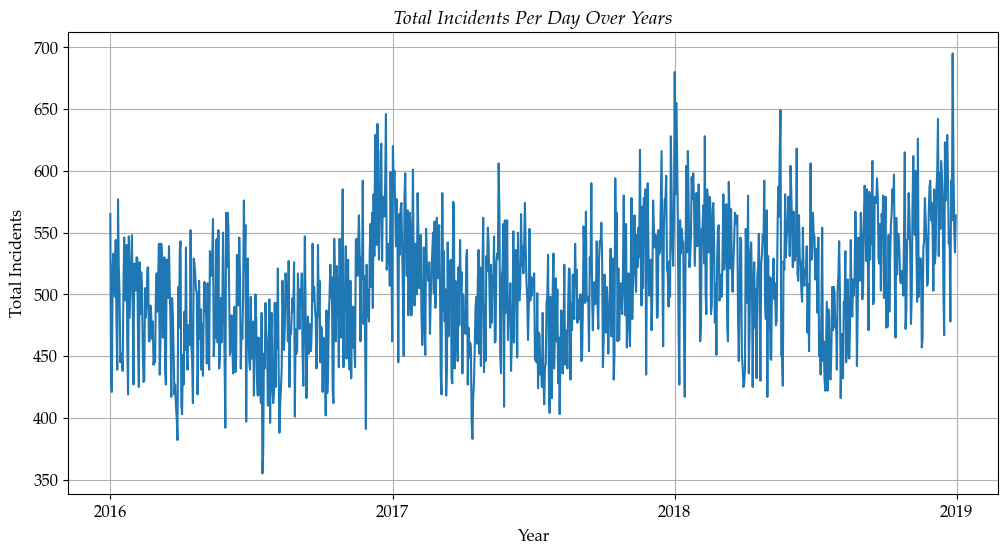

time_call_received
2018    192800
2017    184470
2016    177970
Name: count, dtype: int64


In [9]:
dataframe = data_preprocessor._remove_duplicates(original_dataframe)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)

plotter.incidents_over_years(dataframe)
print_year_occurrences(dataframe)


time_call_received
2018    146593
2017    139215
2016    135870
Name: count, dtype: int64


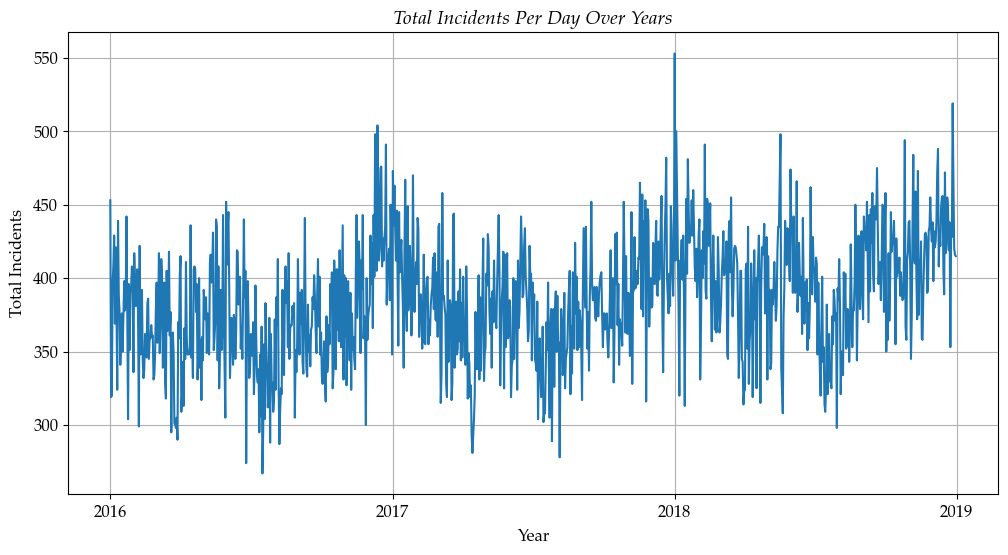

In [10]:
dataframe = data_preprocessor._remove_outside_region(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    142414
2017    133474
2016    128380
Name: count, dtype: int64


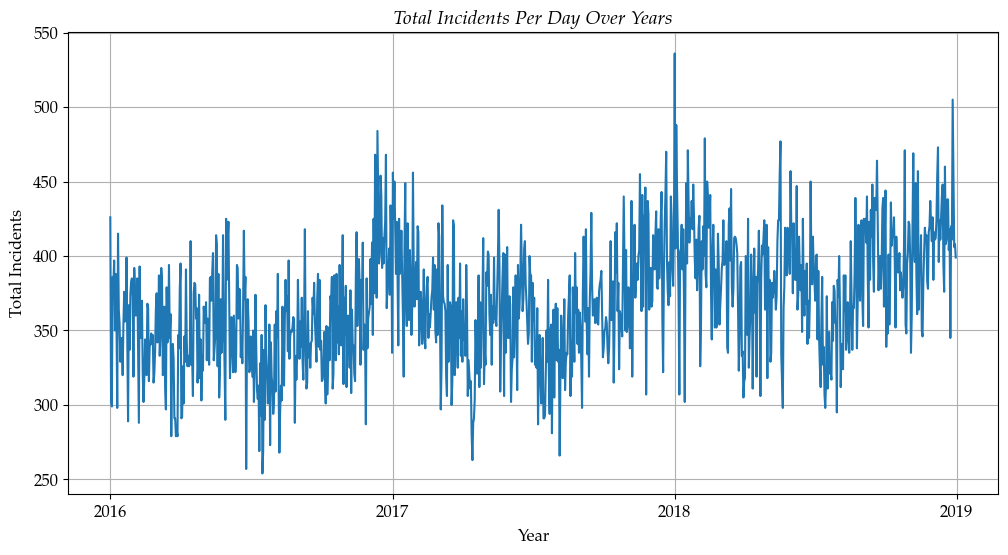

In [11]:
dataframe = data_preprocessor._remove_other_resource_types(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    124716
2017    118597
2016    115214
Name: count, dtype: int64


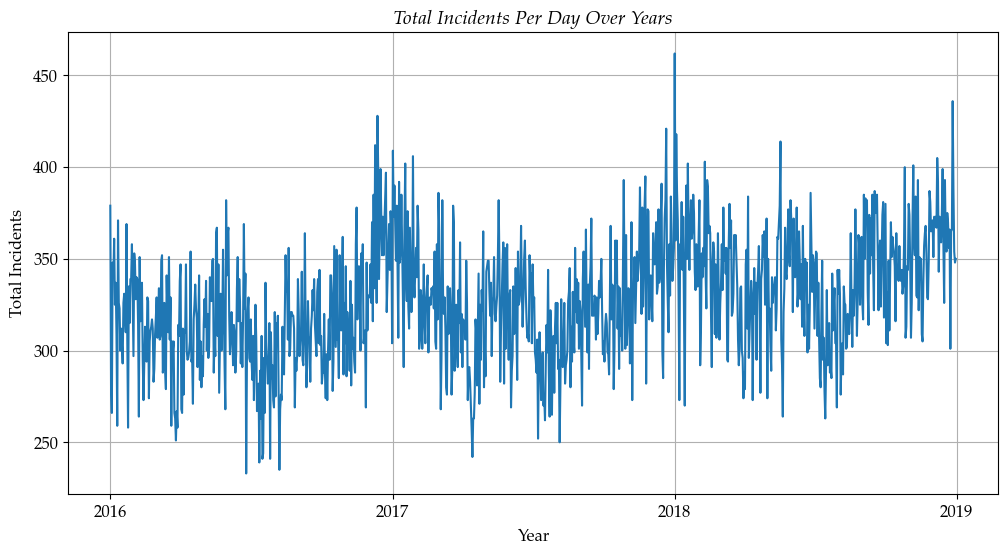

In [12]:
dataframe = data_preprocessor._remove_extra_resources(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    113479
2017    107959
2016    104288
Name: count, dtype: int64


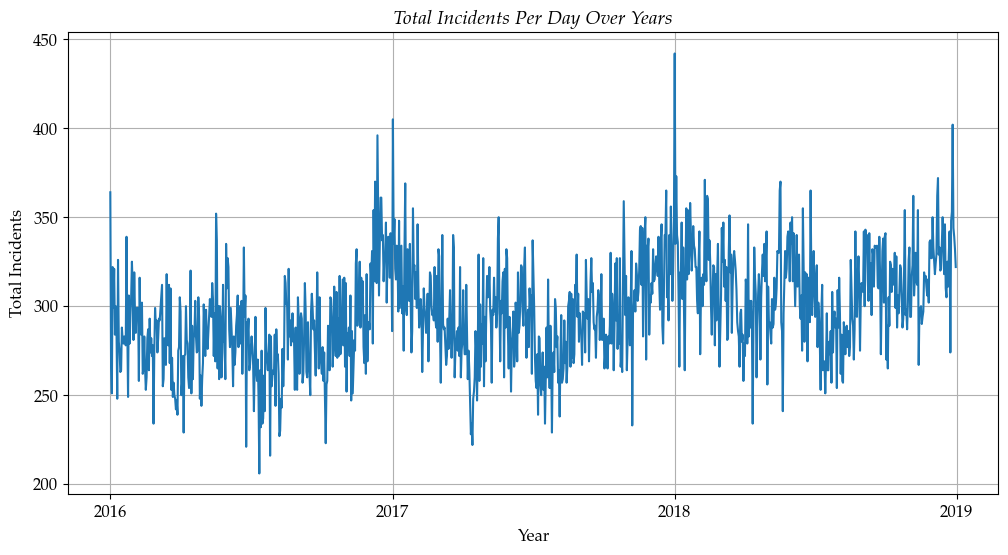

In [13]:
dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    113165
2017    106022
2016    104034
Name: count, dtype: int64


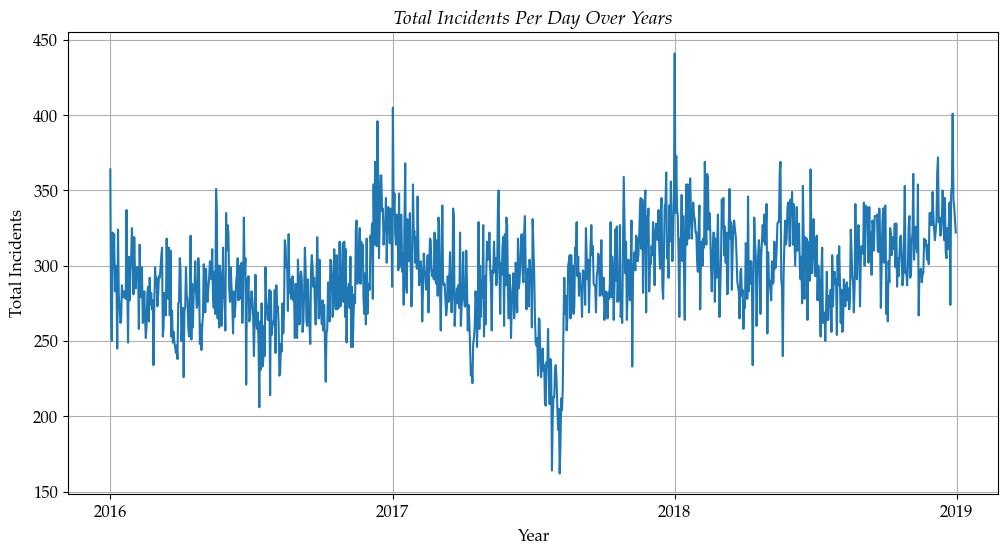

In [14]:
dataframe = data_preprocessor._remove_wrong_timestamps(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


time_call_received
2018    102065
2017     95667
2016     93232
Name: count, dtype: int64


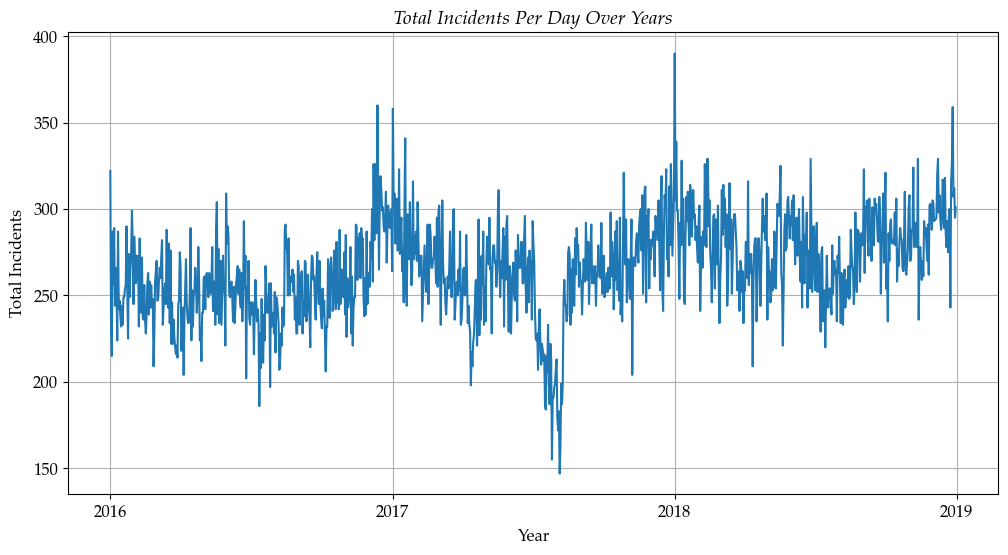

In [15]:
dataframe = data_preprocessor._fix_timestamps(dataframe)
dataframe = data_preprocessor._remove_na(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


c:\Users\sindr\Documents\Projects\Emergency-Optimizers\Data-Processing\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


time_call_received
2018    95828
2017    88698
2016    86481
Name: count, dtype: int64


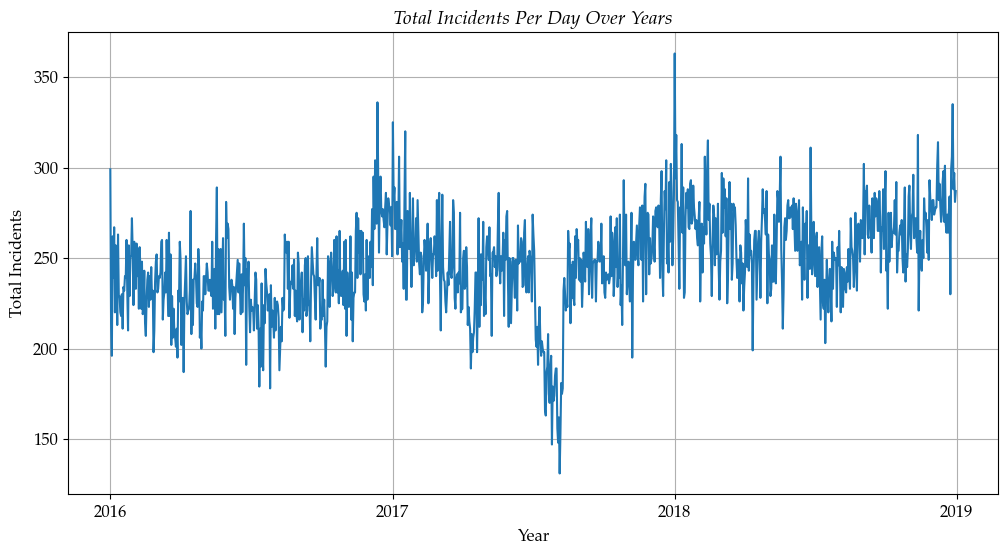

In [16]:
dataframe = data_preprocessor._remove_outliers(dataframe)

print_year_occurrences(dataframe)
plotter.incidents_over_years(dataframe)


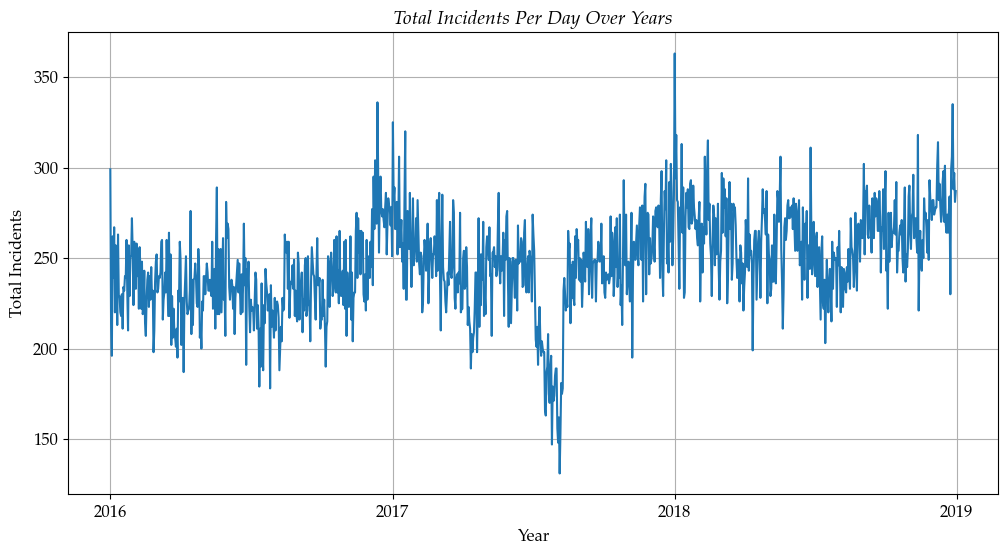

time_call_received
2018    95828
2017    88698
2016    86481
Name: count, dtype: int64


In [17]:
plotter.incidents_over_years(data_loader.enhanced_incidents_df)
print_year_occurrences(data_loader.enhanced_incidents_df)


# Records loss between 2017-2018

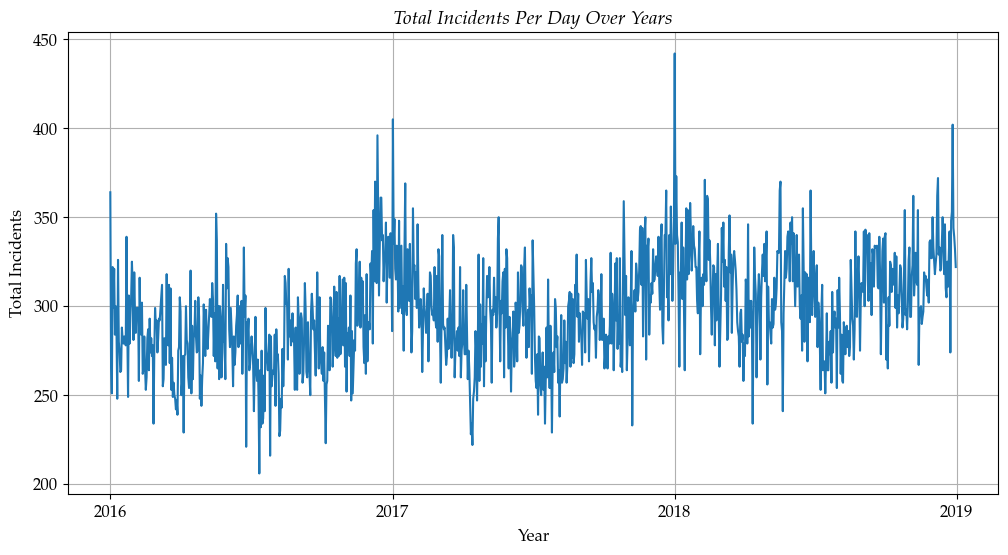

time_call_received
2018    113479
2017    107959
2016    104288
Name: count, dtype: int64


,triage_impression_during_call,resource_id,resource_type,resources_sent,time_call_received,time_incident_created,time_resource_appointed,time_ambulance_dispatch_to_scene,time_ambulance_arrived_at_scene,time_ambulance_dispatch_to_hospital,...,total_V1_incidents_hour_14,total_V1_incidents_hour_15,total_V1_incidents_hour_16,total_V1_incidents_hour_17,total_V1_incidents_hour_18,total_V1_incidents_hour_19,total_V1_incidents_hour_20,total_V1_incidents_hour_21,total_V1_incidents_hour_22,total_V1_incidents_hour_23


In [18]:
dataframe = data_preprocessor._remove_duplicates(original_dataframe)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)
dataframe = data_preprocessor._remove_outside_region(dataframe)
dataframe = data_preprocessor._remove_other_resource_types(dataframe)
dataframe = data_preprocessor._remove_extra_resources(dataframe)
dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)

plotter.incidents_over_years(dataframe)
print_year_occurrences(dataframe)

dataframe[(dataframe["time_call_received"].dt.year == 2019) & (dataframe["time_call_received"].dt.month == 1) & (dataframe["time_call_received"].dt.day == 16)].tail()


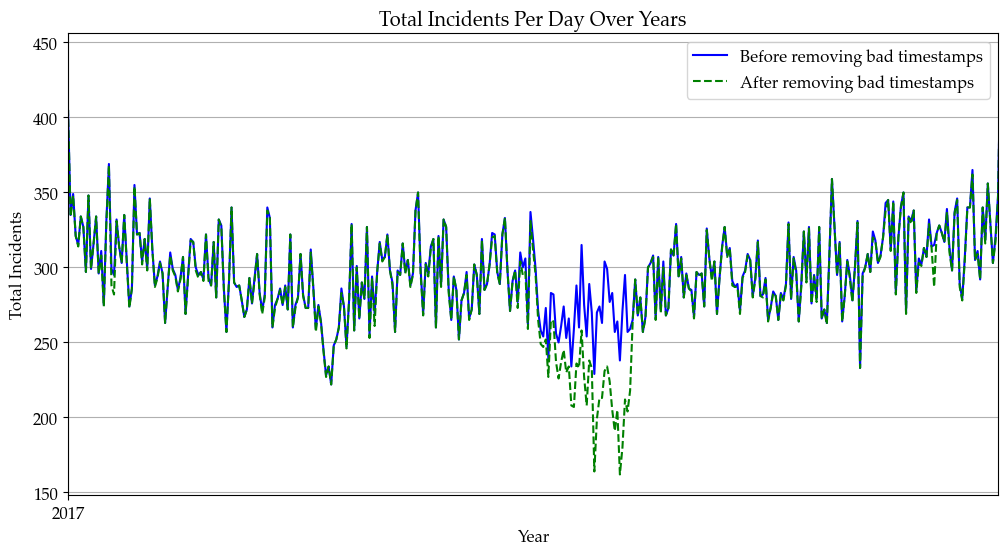

time_call_received
2018    113165
2017    106022
2016    104034
Name: count, dtype: int64


In [19]:
dataframe_after_timestamps = data_preprocessor._remove_wrong_timestamps(dataframe)

plotter.overlay_incidents_over_years(dataframe, dataframe_after_timestamps, limit_left="2017-01-01", limit_right="2017-12-31")
print_year_occurrences(dataframe_after_timestamps)